# Project 4: Exploring the UK's milk imports and exports
by Tony Hirst and Michel Wermelinger, 19 November 2015, 28 March 2016, 18 October 2017, minor edit 20 December 2017

This is the project notebook for Part 4 of The Open University's Learn to Code for Data Analysis course.

A country's economy depends, sometimes heavily, on its exports and imports. The United Nations Comtrade database provides data on global trade. It will be used to analyse the UK's imports and exports of milk and cream in 2015:

How much does the UK export and import and is the balance positive (more exports than imports)?

Which are the main trading partners, i.e. from/to which countries does the UK import/export the most?

Which are the regular customers, i.e. which countries buy milk from the UK every month?

Which countries does the UK both import from and export to?

# Loading Data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r'C:\Users\Jojo3\Downloads\Project 4\comtrade_milk_uk_jan_jul_15.csv', dtype={'Commodity Code':str})

# Cleaning Data

In [3]:
df.columns

Index(['Classification', 'Year', 'Period', 'Period Desc.', 'Aggregate Level',
       'Is Leaf Code', 'Trade Flow Code', 'Trade Flow', 'Reporter Code',
       'Reporter', 'Reporter ISO', 'Partner Code', 'Partner', 'Partner ISO',
       '2nd Partner Code', '2nd Partner', '2nd Partner ISO',
       'Customs Proc. Code', 'Customs', 'Mode of Transport Code',
       'Mode of Transport', 'Commodity Code', 'Commodity', 'Qty Unit Code',
       'Qty Unit', 'Qty', 'Alt Qty Unit Code', 'Alt Qty Unit', 'Alt Qty',
       'Netweight (kg)', 'Gross weight (kg)', 'Trade Value (US$)',
       'CIF Trade Value (US$)', 'FOB Trade Value (US$)', 'Flag'],
      dtype='object')

From above columns we need only relevant ones like Period,Trade Flow,Partner,Commodity,Trade Value (US$) and we need to change the Commodity name look convinent for the table.

In [4]:
def milkType(code):
    if code == '0401': # neither concentrated nor sweetened
        return 'unprocessed'
    if code == '0402': # concentrated or sweetened
        return 'processed' 
    return 'unknown'

COMMODITY = 'Milk and cream'
df[COMMODITY] = df['Commodity Code'].apply(milkType)
MONTH = 'Period'
PARTNER = 'Partner'
FLOW = 'Trade Flow'
VALUE = 'Trade Value (US$)'
headings = [MONTH, PARTNER, FLOW, COMMODITY, VALUE]
df = df[headings]

In [5]:
df = df.dropna()

In [6]:
df = df[df['Partner'] != 'World']

# Finding Answers

Q)How much does the UK export and import and is the balance positive (more exports than imports)?

Trade Flow
Exports    265029661
Imports    156483978
Name: Trade Value (US$), dtype: int64


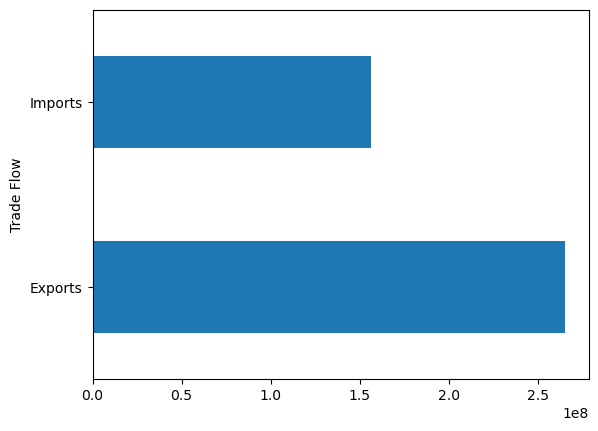

In [7]:
df_trade = df.groupby('Trade Flow')
df_trade['Trade Value (US$)'].aggregate(sum)

df_trade['Trade Value (US$)'].aggregate(sum).plot(kind='barh')

print(df_trade['Trade Value (US$)'].aggregate(sum))

Q)How much does the UK Trade of unprocessed and processed Milk is the balance positive (more processed than unprocessed)?

Milk and cream
processed      220039823
unprocessed    201473816
Name: Trade Value (US$), dtype: int64


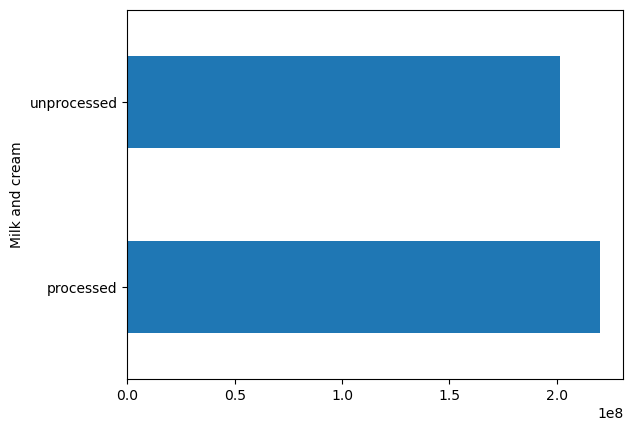

In [8]:
df_trade = df.groupby(COMMODITY)
df_trade['Trade Value (US$)'].aggregate(sum)

df_trade['Trade Value (US$)'].aggregate(sum).plot(kind='barh')

print(df_trade['Trade Value (US$)'].aggregate(sum))

Q) Which are the main trading partners, i.e. from/to which countries does the UK import/export the most?

In [9]:
df_partner_import = df[df["Trade Flow"]=='Imports'].groupby(['Partner'])['Trade Value (US$)'].aggregate(sum)
df_partner_import.tail(5)

Partner
Spain                       4910615
Sweden                      1962413
United Arab Emirates          27225
United Kingdom                 2302
United States of America      46044
Name: Trade Value (US$), dtype: int64

The UK Imports from 21 countries.
The 5 biggest Importers to the UK are:


<AxesSubplot:ylabel='Partner'>

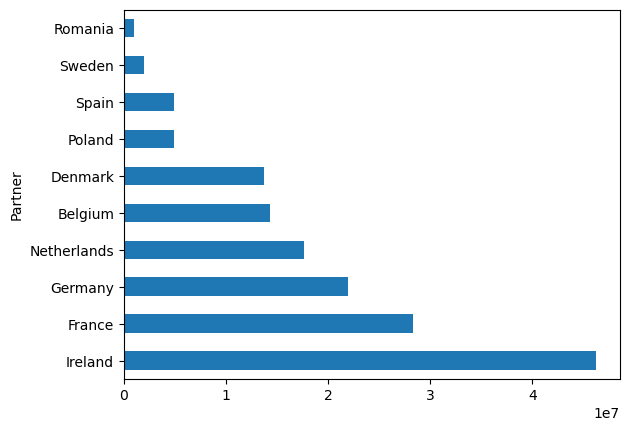

In [10]:
imports = df[df[FLOW] == 'Imports']
grouped = imports.groupby([PARTNER])
print('The UK Imports from', len(grouped), 'countries.')
print('The 5 biggest Importers to the UK are:')
totalImports = grouped[VALUE].aggregate(sum).sort_values(inplace=False,ascending=False)
totalImports.head(10).plot(kind='barh')

The UK Exports from 107 countries.
The 5 Biggest Exporters to the UK are:


<AxesSubplot:ylabel='Partner'>

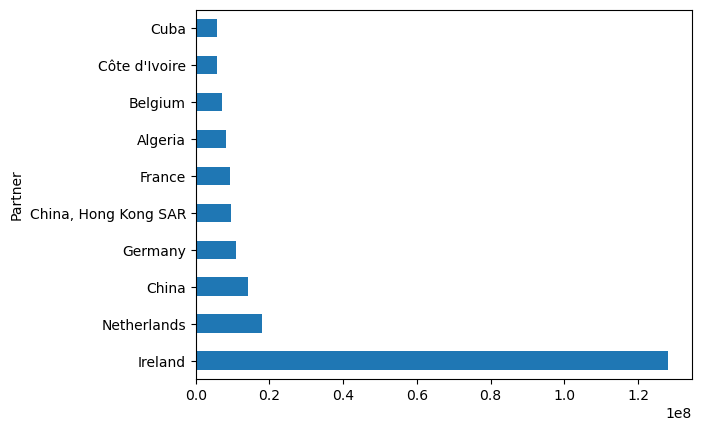

In [11]:
exports = df[df[FLOW] == 'Exports']
grouped = exports.groupby([PARTNER])
print('The UK Exports from', len(grouped), 'countries.')
print('The 5 Biggest Exporters to the UK are:')
totalExports =grouped[VALUE].aggregate(sum).sort_values(inplace=False,ascending=False)
totalExports.head(10).plot(kind='barh')

Q) Which are the regular customers, i.e. which countries buy milk from the UK every month?

In [19]:
exports = df[df[FLOW] == 'Exports']

def regularpartners(g):
    return (len(g) <=12) | (g['Trade Value (US$)'].sum()>200000) & (g[COMMODITY] == 'processed').all()


strong_exporters = exports.groupby(['Trade Flow','Partner']).filter(regularpartners)
strong_exporters = strong_exporters.groupby([PARTNER])[['Trade Value (US$)']].aggregate([len,sum])
strong_exporters = strong_exporters.sort_values(by=('Trade Value (US$)', 'len'), inplace=False, ascending=False).head(17)
print(strong_exporters)
print('\n')
print(round(percentage),'% of the total UK exports are due to these regular customers.')
print('Total regular Trading countries 17')

                     Trade Value (US$)           
                                   len        sum
Partner                                          
Cyprus                              10     101579
Ireland                             10  128155891
Italy                               10     173689
China, Hong Kong SAR                10    9482458
China                               10   14111163
Hungary                             10      71378
Portugal                            10      25855
Denmark                             10     335068
France                              10    9381762
Spain                               10    1229172
Belgium                             10    7209121
Sweden                              10      34972
Poland                              10     106659
United Arab Emirates                10    1590593
Netherlands                         10   18018603
Malta                               10     129516
Germany                             10   10828464


In [13]:
exports['Trade Value (US$)'].sum()
strong_exporters['Trade Value (US$)'].sum()

percentage = (200985943/265029661) * 100


Q) Which countries does the UK both import from and export to?

In [15]:
bi_directional = pd.pivot_table(df,index=[PARTNER], columns=[FLOW], 
                        values=VALUE, aggfunc=sum)

In [16]:
bi_directional = bi_directional.dropna()

In [17]:
print(bi_directional)
print('\n')
print('There are 20 countries that we have bi-directional trade')

Trade Flow                    Exports     Imports
Partner                                          
Austria                       56279.0       780.0
Belgium                     7209121.0  14325697.0
Czech Rep.                     2590.0    486889.0
Denmark                      335068.0  13681759.0
France                      9381762.0  28314091.0
Germany                    10828464.0  21899123.0
Hungary                       71378.0      4762.0
Ireland                   128155891.0  46263897.0
Italy                        173689.0    321635.0
Latvia                          567.0       870.0
Lithuania                      1172.0    318407.0
Netherlands                18018603.0  17658912.0
Poland                       106659.0   4933917.0
Portugal                      25855.0    308654.0
Romania                          36.0    975996.0
Slovakia                         65.0     39990.0
Spain                       1229172.0   4910615.0
Sweden                        34972.0   1962413.0


Q) Which Commodity is more Exported and Imported

Milk and cream
processed      88079867
unprocessed    68404111
Name: Trade Value (US$), dtype: int64


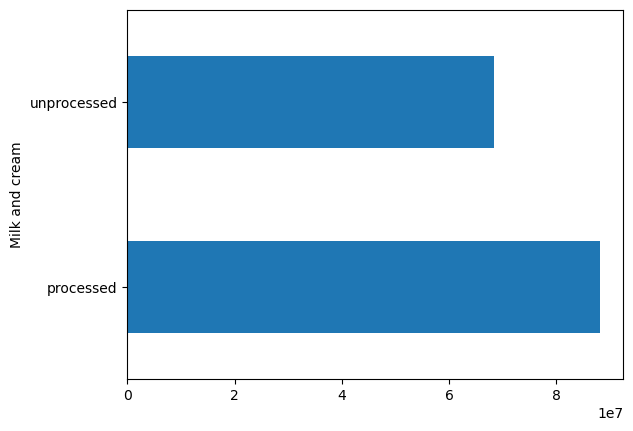

In [23]:
imports = df[df[FLOW] == 'Imports']
df_trade = imports.groupby(COMMODITY)
df_trade['Trade Value (US$)'].aggregate(sum)

df_trade['Trade Value (US$)'].aggregate(sum).plot(kind='barh')

print(df_trade['Trade Value (US$)'].aggregate(sum))

Milk and cream
processed      131959956
unprocessed    133069705
Name: Trade Value (US$), dtype: int64


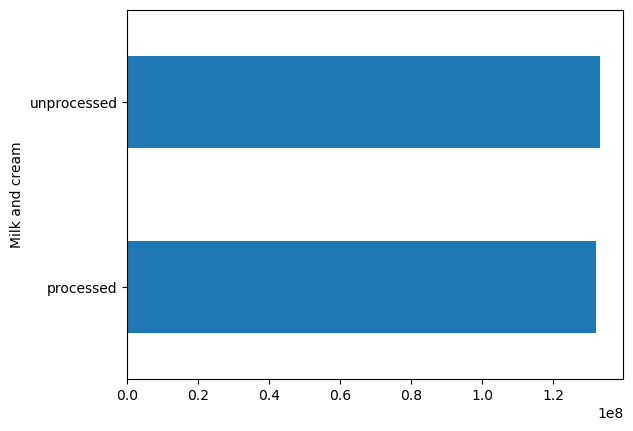

In [21]:
imports = df[df[FLOW] == 'Exports']
df_trade = imports.groupby(COMMODITY)
df_trade['Trade Value (US$)'].aggregate(sum)

df_trade['Trade Value (US$)'].aggregate(sum).plot(kind='barh')

print(df_trade['Trade Value (US$)'].aggregate(sum))

# Conslusion
There is Total of 108 contries UK Trade with in 2015. The Milk products are more Exported than imported, The commodity more imported is processed. The most traded commodity is also processed milk. UK imports from 21 countries and Ireland is the on the top of the list. There are 17 countries that we trade regularly and they take 76% of UK's total Exports.